#                            
# **1. Data Exploration and Preprocessing**               
#                             

##
## 1.1 Import libraries
##

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

##
## 1.2 Load the red and white wine datasets
##

In [10]:
red_wine  = pd.read_csv('winequality-red.csv',  sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

In [12]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##
## 1.3 Label each row by wine type and combine into one DataFrame
##

In [17]:
red_wine['wine_type']   = 'red'
white_wine['wine_type'] = 'white'
df = pd.concat([red_wine, white_wine], ignore_index=True)

##
## 1.4 Create a binary target: "good" if quality ≥ 6, else "bad"
##

In [20]:
df['quality_label'] = df['quality'].apply(lambda q: 'good' if q >= 6 else 'bad')

##
## 1.5 Inspect missing values, duplicate rows, and data types
##

In [23]:
print("Missing values per column:\n", df.isnull().sum(), "\n")
print("Number of duplicate rows:", df.duplicated().sum(), "\n")
df.info()   # prints dtype and non-null counts

Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
quality_label           0
dtype: int64 

Number of duplicate rows: 1177 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   fl

##
## 1.6 Look at class balance for wine_type and quality_label
##

In [26]:
print("\nWine types:\n", df['wine_type'].value_counts())
print("\nQuality labels:\n", df['quality_label'].value_counts())


Wine types:
 wine_type
white    4898
red      1599
Name: count, dtype: int64

Quality labels:
 quality_label
good    4113
bad     2384
Name: count, dtype: int64


##
## 1.7 Visualize the pre-SMOTE class balance for quality_label
##

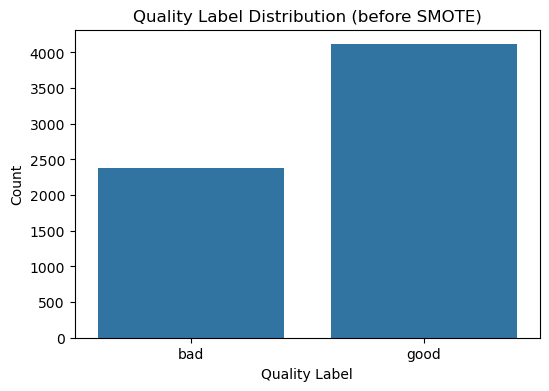

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality_label', data=df)
plt.title("Quality Label Distribution (before SMOTE)")
plt.xlabel("Quality Label")
plt.ylabel("Count")
plt.show()

##
## 1.8 Summary statistics and feature correlations
##


Numeric summary statistics:
                        count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

       

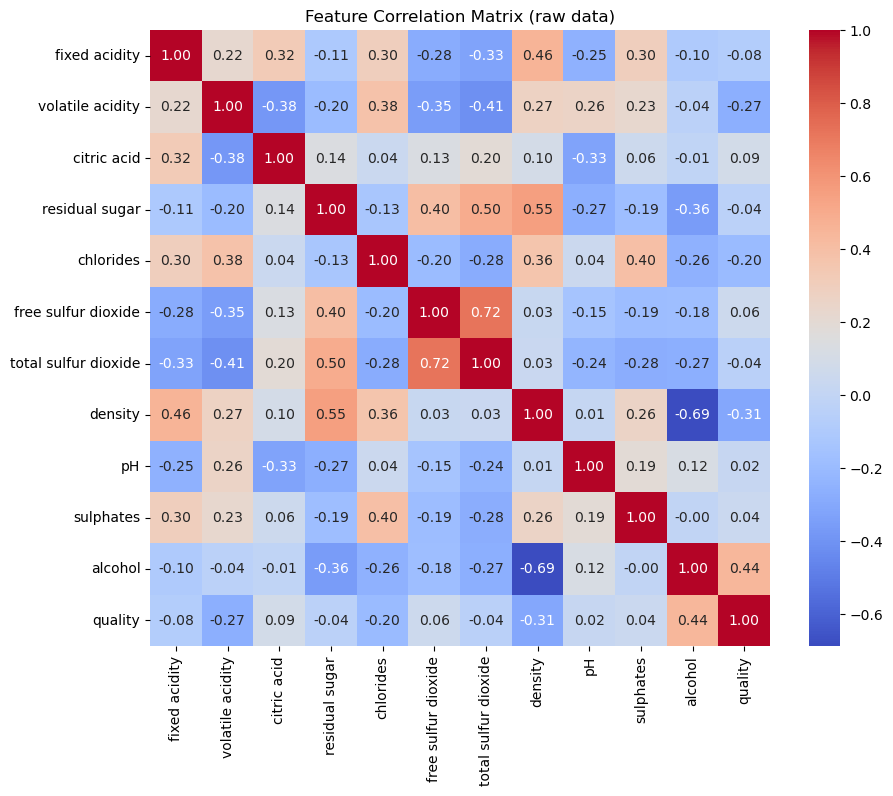

In [32]:
print("\nNumeric summary statistics:\n", df.describe().T)
plt.figure(figsize=(10,8))
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix (raw data)")
plt.savefig('corr.png', dpi=300, bbox_inches='tight')
plt.show()


##
## 1.9 Univariate distributions and boxplots by quality_label
##

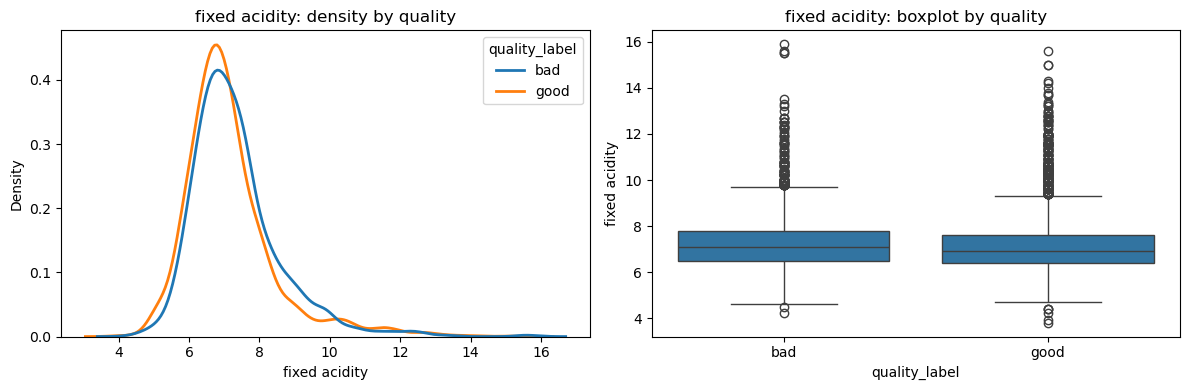

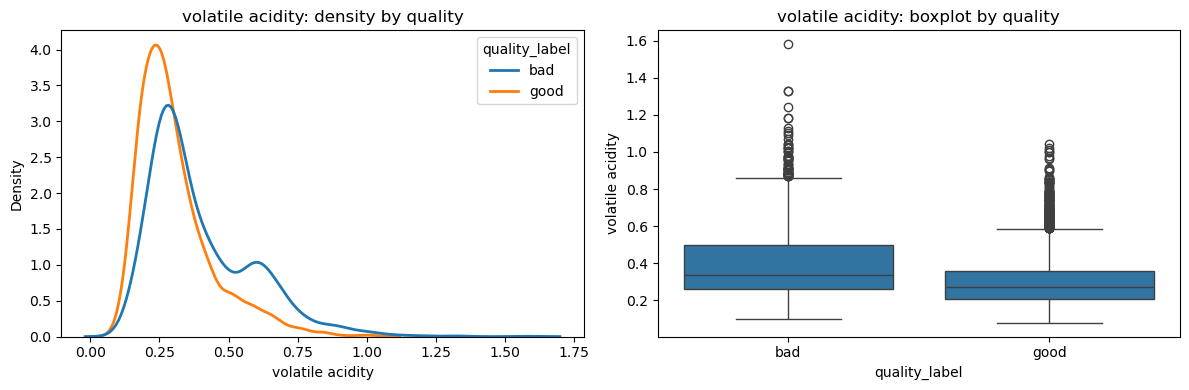

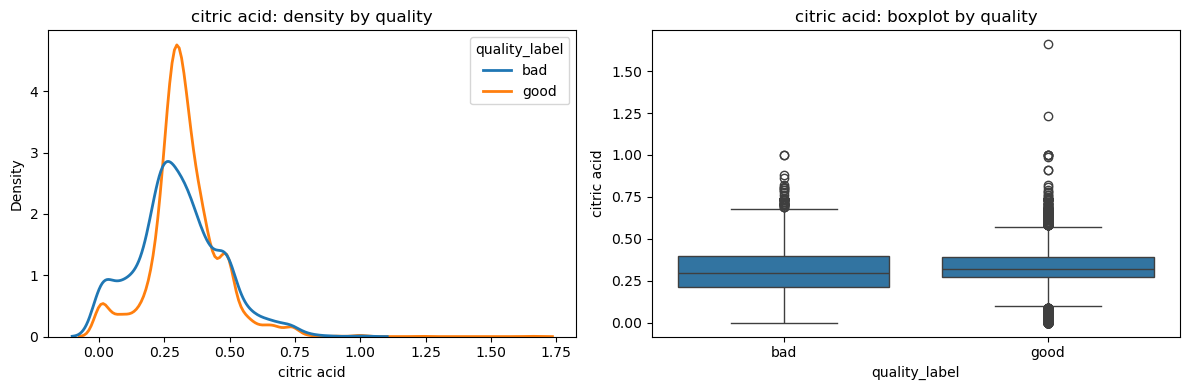

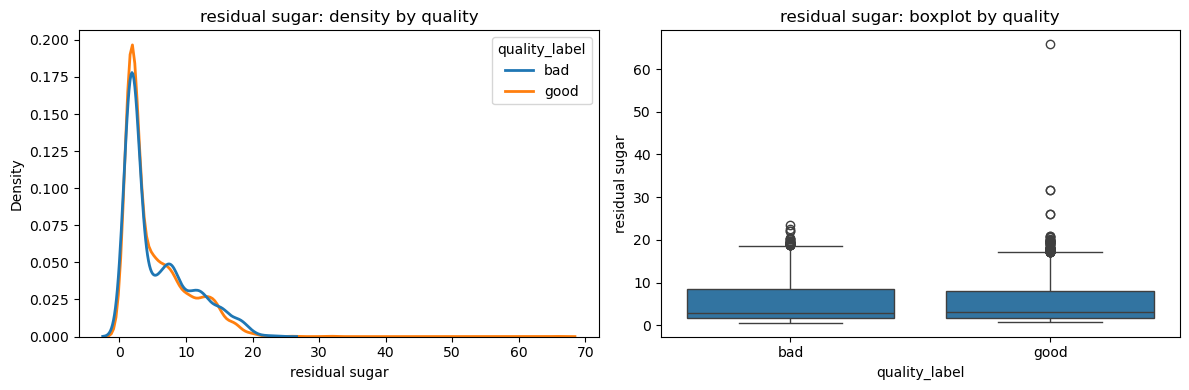

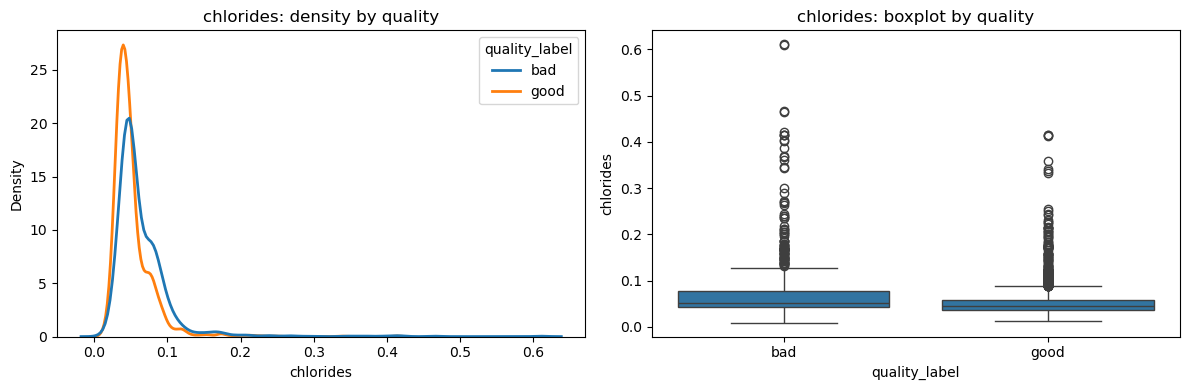

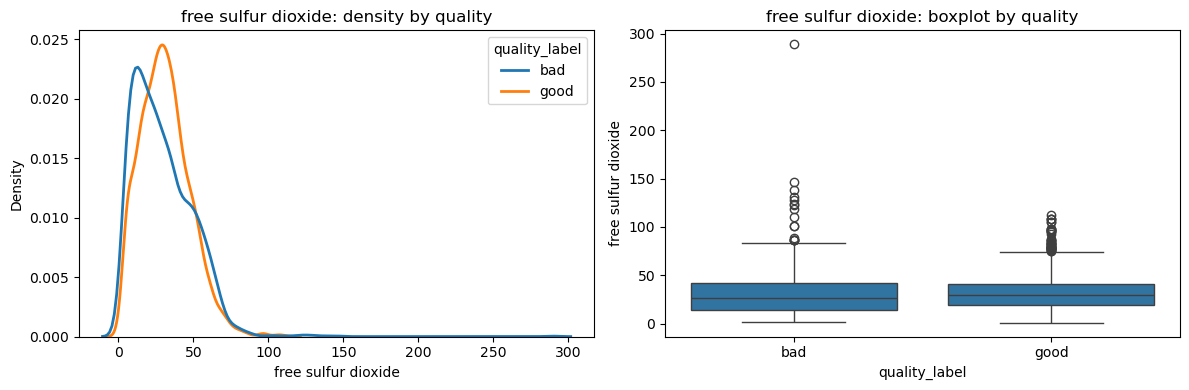

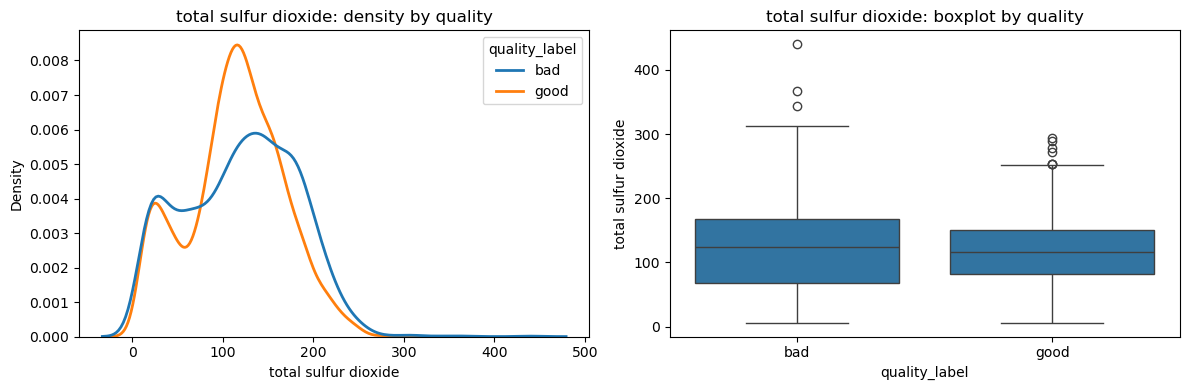

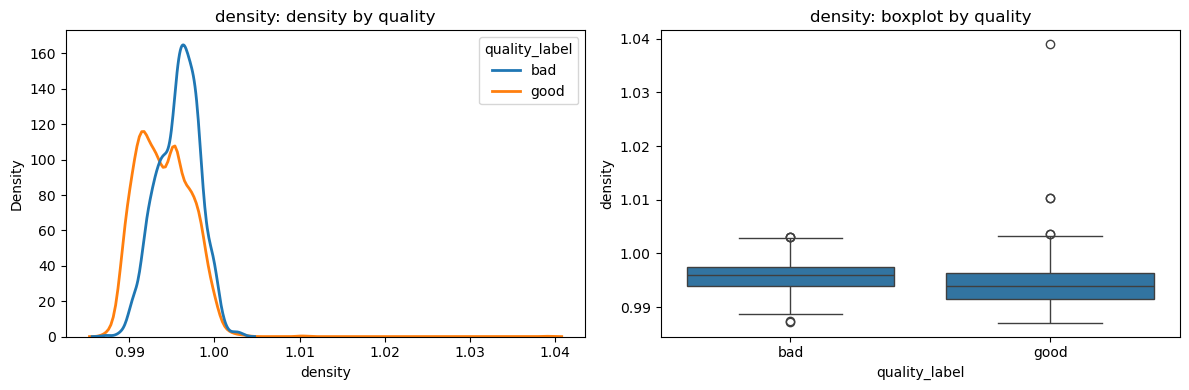

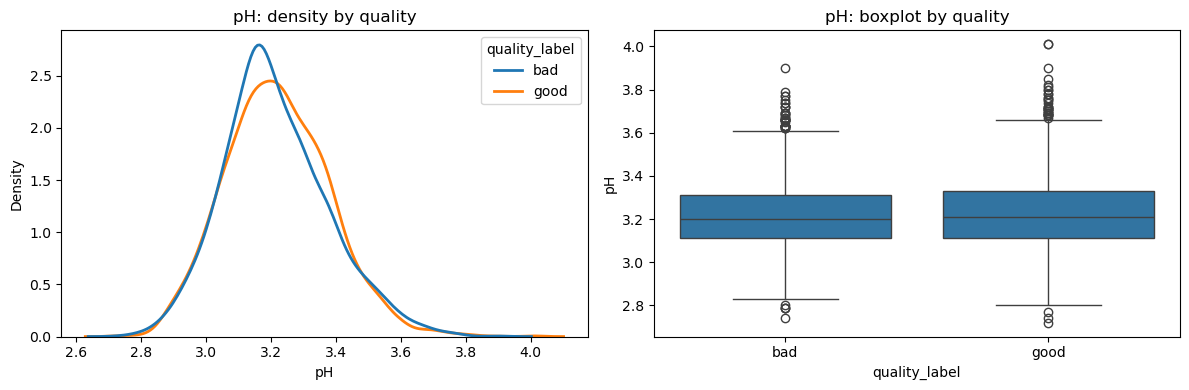

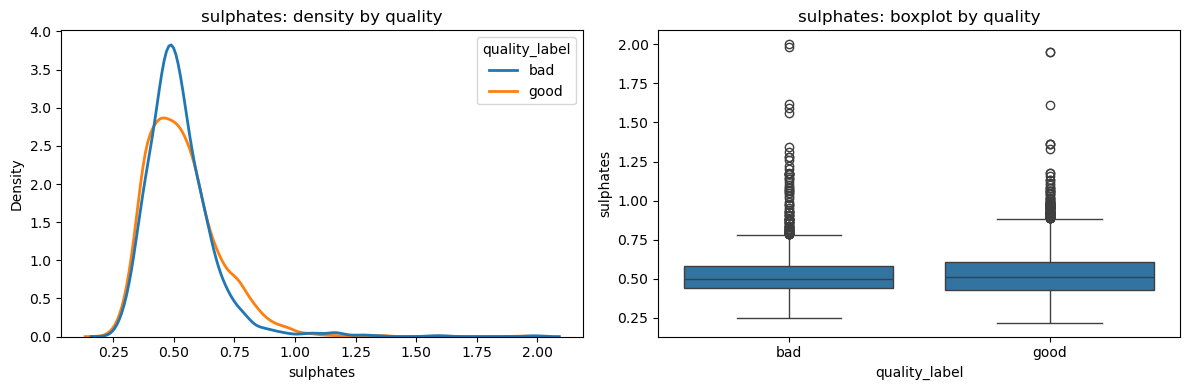

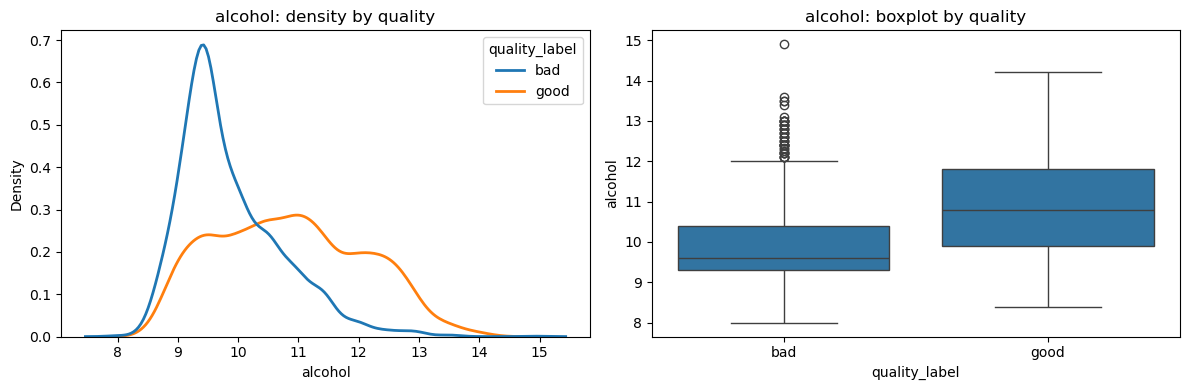

In [34]:
features = [c for c in df.columns if c not in ['quality','quality_label','wine_type']]
for feat in features:
    plt.figure(figsize=(12,4))
    # Density comparison
    plt.subplot(1,2,1)
    sns.kdeplot(data=df, x=feat, hue='quality_label',
                common_norm=False, fill=False, linewidth=2)
    plt.title(f"{feat}: density by quality")
    # Boxplot for outliers
    plt.subplot(1,2,2)
    sns.boxplot(x='quality_label', y=feat, data=df)
    plt.title(f"{feat}: boxplot by quality")
    plt.tight_layout()
    plt.show()

##
## 1.10 Identify skewed features (absolute skew > 0.75)
##

In [37]:
skewed = df[features].skew().abs()
skewed_feats = skewed[skewed > 0.75].index.tolist()
print("\nFeatures to transform (skew > 0.75):", skewed_feats)


Features to transform (skew > 0.75): ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'sulphates']


##
## 1.11 Box–Cox transform skewed features (adding a small constant)
##

In [39]:
df_bc = df.copy()
pt = PowerTransformer(method='box-cox', standardize=False)
df_bc[skewed_feats] = pt.fit_transform(df_bc[skewed_feats] + 1e-6)

##
## 1.12 Visualize distributions before and after Box–Cox
##

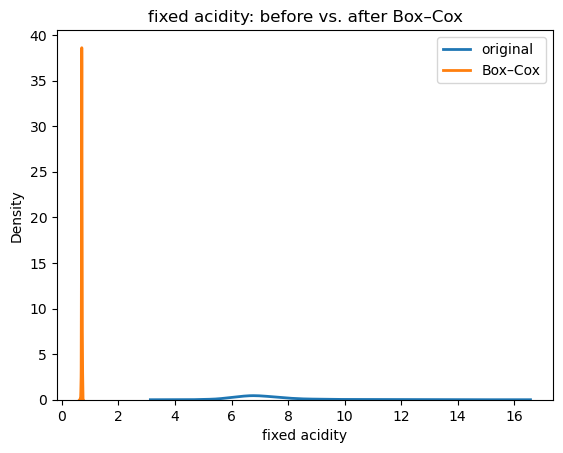

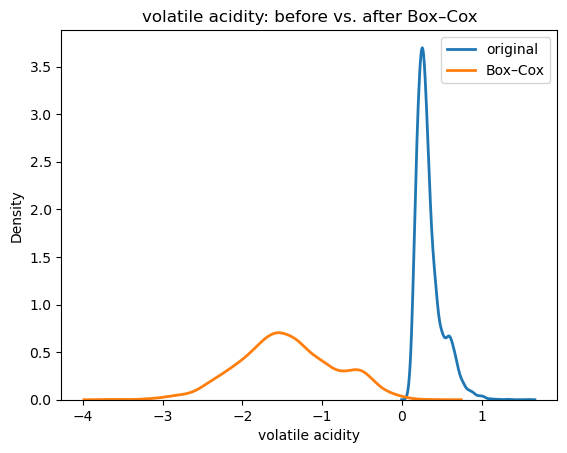

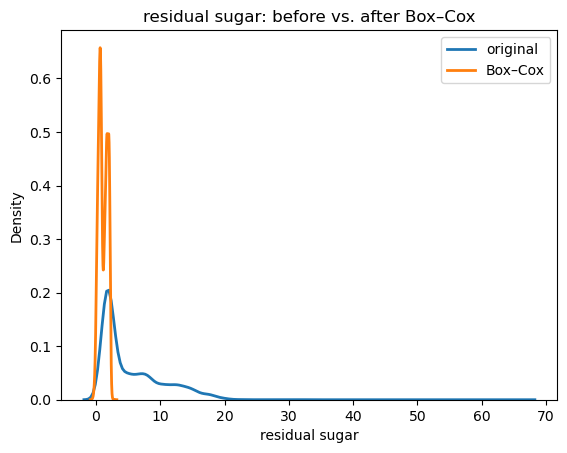

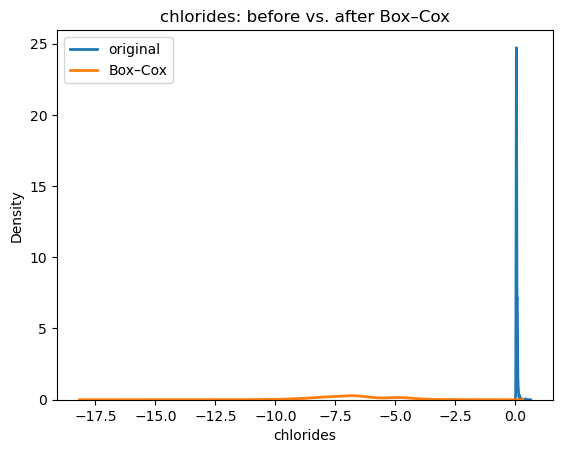

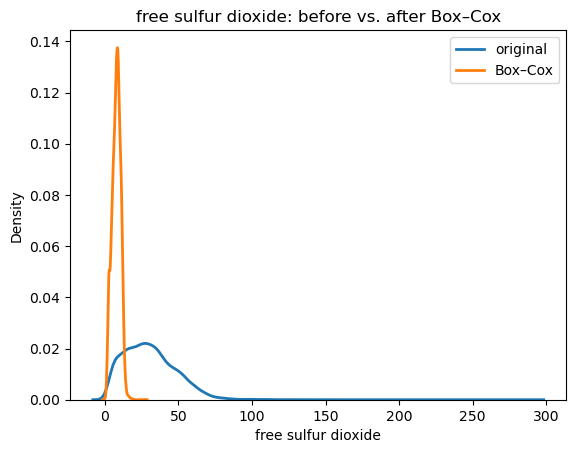

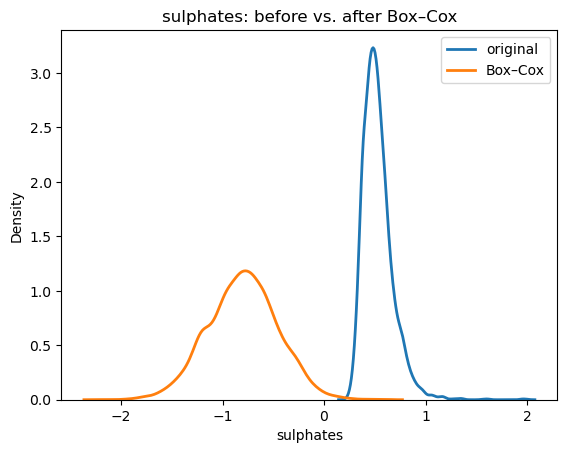

In [44]:
for feat in skewed_feats:
    plt.figure()
    sns.kdeplot(df[feat], label='original', linewidth=2)
    sns.kdeplot(df_bc[feat], label='Box–Cox', linewidth=2)
    plt.title(f"{feat}: before vs. after Box–Cox")
    plt.legend()
    plt.show()

##
## 1.13 Winsorize (clip) all features at 1st and 99th percentiles
##

In [47]:
df_win = df_bc.copy()
for col in features:
    lower, upper = df_win[col].quantile([0.01, 0.99])
    df_win[col] = df_win[col].clip(lower, upper)

##
## 1.14 Show boxplots for one example skewed feature pre/post winsorizing
##

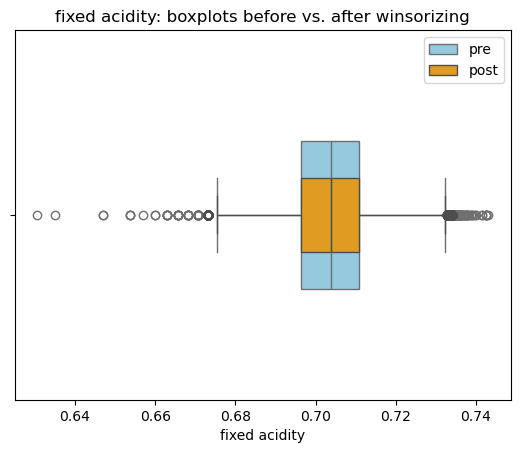

In [50]:
example = skewed_feats[0]
plt.figure()
sns.boxplot(x=df_bc[example], color='skyblue', width=0.4, label='pre-winsorize')
sns.boxplot(x=df_win[example], color='orange', width=0.2, label='post-winsorize')
plt.title(f"{example}: boxplots before vs. after winsorizing")
plt.legend(['pre','post'])
plt.show()


##
## 1.15 Drop highly collinear features (|corr| > 0.90)
##

In [53]:
corr_abs = df_win[features].corr().abs()
upper_tri = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.90)]
print("\nDropping these collinear columns:", to_drop)
df_clean = df_win.drop(columns=to_drop)
final_features = [c for c in features if c not in to_drop]


Dropping these collinear columns: []


##
## 1.16 Split into training and test sets (stratified by quality_label)
##

In [56]:
X = df_clean[final_features]
y = df_clean['quality_label'].map({'bad':0,'good':1})
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

##
## 1.17 Visualize train labels before SMOTE
##

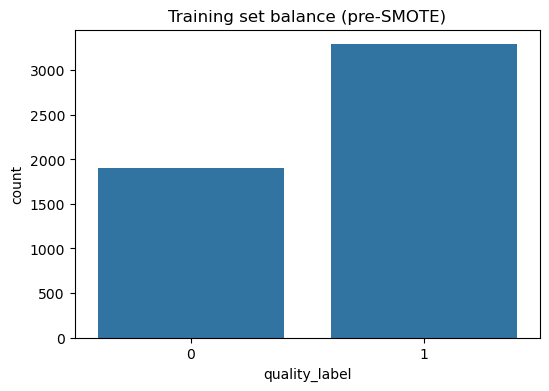

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Training set balance (pre-SMOTE)")
plt.show()

##
## 1.18 Balance the training set via SMOTE
##

In [62]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

##
## 1.19 Visualize train labels after SMOTE
##

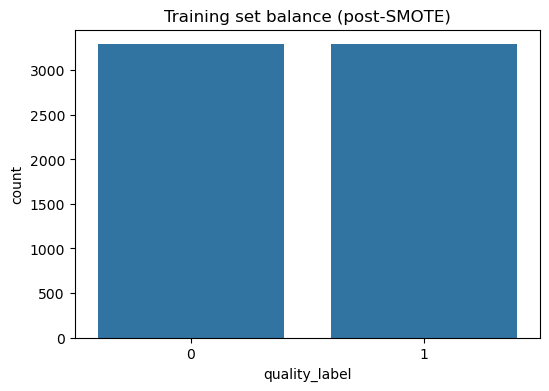

In [65]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res)
plt.title("Training set balance (post-SMOTE)")
plt.show()

##
## 1.20 Standard scale all features
##

In [68]:
scaler = StandardScaler()
X_train_pre = pd.DataFrame(X_train_res, columns=final_features)  # before scaling
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_pre),
                              columns=final_features)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test),
                              columns=final_features)

#                            
# **2. SVM and Logistic Regression Implementation**               
#                             

##
## 2.1 Logistic Regression scratch class
##

In [72]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=500, reg_lambda=0.0, verbose=False):
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        self.verbose = verbose

    def sigmoid(self, z):
        # logistic / sigmoid activation
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # initialize weights and bias
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0
        self.loss_history = []

        for i in range(self.epochs):
            # linear combination
            z = X.dot(self.w) + self.b
            # prediction probabilities
            y_pred = self.sigmoid(z)

            # compute gradients with L2 regularization
            error = y_pred - y
            dw = (X.T.dot(error) + self.reg_lambda * self.w) / n_samples
            db = error.mean()

            # gradient descent update
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # compute log‐loss + regularization term
            loss = - (y * np.log(y_pred + 1e-15) +
                      (1 - y) * np.log(1 - y_pred + 1e-15)).mean()
            loss += (self.reg_lambda / (2 * n_samples)) * np.sum(self.w ** 2)
            self.loss_history.append(loss)

            # optional progress printout
            if self.verbose and i % 100 == 0:
                print(f"Epoch {i}: loss = {loss:.4f}")

        return self

    def predict_proba(self, X):
        # output probabilities for positive class
        return self.sigmoid(X.dot(self.w) + self.b)

    def predict(self, X, threshold=0.5):
        # binary prediction based on threshold
        return (self.predict_proba(X) >= threshold).astype(int)



##
## 2.2 Linear SVM scratch class (hinge loss)
##

In [75]:
class SVMScratch:
    def __init__(self, lr=0.001, epochs=500, C=1.0, verbose=False):
        self.lr = lr      # learning rate
        self.epochs = epochs
        self.C = C        # regularization strength
        self.verbose = verbose

    def fit(self, X, y):
        # convert labels from {0,1} to {-1,+1}
        y_mod = np.where(y == 1, +1, -1)
        n_samples, n_features = X.shape

        # initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0.0
        self.loss_history = []

        for i in range(self.epochs):
            # compute margins
            margins = y_mod * (X.dot(self.w) + self.b)
            # identify points inside the margin
            mask = margins < 1

            # gradient for hinge + regularization
            dw = self.w - (self.C / n_samples) * X[mask].T.dot(y_mod[mask])
            db = - (self.C / n_samples) * y_mod[mask].sum()

            # gradient descent update
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # compute hinge loss + regularization
            hinge_loss = np.where(margins < 1, 1 - margins, 0)
            loss = 0.5 * np.dot(self.w, self.w) + self.C * hinge_loss.mean()
            self.loss_history.append(loss)

            if self.verbose and i % 100 == 0:
                print(f"Epoch {i}: hinge loss = {loss:.4f}")

        return self

    def decision_function(self, X):
        # raw score before threshold
        return X.dot(self.w) + self.b

    def predict(self, X):
        # zero threshold gives class +1 or -1, then map back to {0,1}
        return (self.decision_function(X) >= 0).astype(int)



##
## 2.3 Utility: 5‐fold cross‐validation for accuracy
##

In [78]:
def cross_val_accuracy(model_cls, X, y, cv=5, **model_kwargs):
    # convert pandas inputs to NumPy
    X_arr = X.values if hasattr(X, 'values') else np.asarray(X)
    y_arr = y.values if hasattr(y, 'values') else np.asarray(y)

    n = len(y_arr)
    indices = np.arange(n)
    np.random.seed(42)
    np.random.shuffle(indices)

    # split indices into folds
    fold_sizes = (n // cv) * np.ones(cv, dtype=int)
    fold_sizes[:n % cv] += 1

    accuracies = []
    start = 0
    for size in fold_sizes:
        end = start + size
        val_idx   = indices[start:end]
        train_idx = np.concatenate((indices[:start], indices[end:]))

        X_train_fold = X_arr[train_idx]
        y_train_fold = y_arr[train_idx]
        X_val_fold   = X_arr[val_idx]
        y_val_fold   = y_arr[val_idx]

        model = model_cls(**model_kwargs)
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)
        accuracies.append((preds == y_val_fold).mean())
        start = end

    return np.array(accuracies)



##
## 2.4 Hyperparameter tuning for both models
##

In [81]:
# Logistic Regression grid
best_lr_score, best_lr_params = -np.inf, None
for lr in [0.1, 0.01]:
    for reg in [0.0, 0.1]:
        scores = cross_val_accuracy(
            LogisticRegressionScratch,
            X_train_scaled, y_train_res,
            lr=lr, epochs=500, reg_lambda=reg
        )
        mean_score = scores.mean()
        print(f"LR (lr={lr}, λ={reg}): CV acc = {mean_score:.4f}")
        if mean_score > best_lr_score:
            best_lr_score  = mean_score
            best_lr_params = (lr, reg)

print("→ Best Logistic Regression params:", best_lr_params,
      "with CV acc", round(best_lr_score,4))

LR (lr=0.1, λ=0.0): CV acc = 0.7439
LR (lr=0.1, λ=0.1): CV acc = 0.7439
LR (lr=0.01, λ=0.0): CV acc = 0.7277
LR (lr=0.01, λ=0.1): CV acc = 0.7277
→ Best Logistic Regression params: (0.1, 0.0) with CV acc 0.7439


In [83]:
# SVM grid
best_svm_score, best_svm_params = -np.inf, None
for lr in [0.01, 0.001]:
    for C in [0.1, 1.0, 10.0]:
        scores = cross_val_accuracy(
            SVMScratch,
            X_train_scaled, y_train_res,
            lr=lr, epochs=500, C=C
        )
        mean_score = scores.mean()
        print(f"SVM (lr={lr}, C={C}): CV acc = {mean_score:.4f}")
        if mean_score > best_svm_score:
            best_svm_score  = mean_score
            best_svm_params = (lr, C)

print("→ Best SVM params:", best_svm_params,
      "with CV acc", round(best_svm_score,4))



SVM (lr=0.01, C=0.1): CV acc = 0.6909
SVM (lr=0.01, C=1.0): CV acc = 0.7040
SVM (lr=0.01, C=10.0): CV acc = 0.7340
SVM (lr=0.001, C=0.1): CV acc = 0.6910
SVM (lr=0.001, C=1.0): CV acc = 0.6912
SVM (lr=0.001, C=10.0): CV acc = 0.7277
→ Best SVM params: (0.01, 10.0) with CV acc 0.734


##
## 2.5 Final model fitting on full training data
##

In [86]:
# Best Logistic Regression
opt_lr, opt_reg = best_lr_params
final_lr = LogisticRegressionScratch(lr=opt_lr, epochs=500, reg_lambda=opt_reg)
final_lr.fit(X_train_scaled.values, y_train_res.values)

In [88]:
# Best SVM
opt_svm_lr, opt_svm_C = best_svm_params
final_svm = SVMScratch(lr=opt_svm_lr, epochs=500, C=opt_svm_C)
final_svm.fit(X_train_scaled.values, y_train_res.values)

#                            
# **3. Kernel Methods (Polynomial Feature Expansion)**               
#                             

##
## 3.1 Define a function to expand features to degree 2
##

In [92]:
def polynomial_features(X):
    # convert to NumPy array if needed
    X_arr = X.values if hasattr(X, 'values') else np.asarray(X)
    n, m = X_arr.shape

    # start with original features
    expanded = [X_arr]

    # add all pairwise products x_i * x_j for i <= j
    for i in range(m):
        for j in range(i, m):
            product = (X_arr[:, i] * X_arr[:, j]).reshape(n, 1)
            expanded.append(product)

    # concatenate into a single array of shape (n, m + m(m+1)/2)
    return np.hstack(expanded)

##
## 3.2 Build polynomial features for train and test
##

In [95]:
X_train_poly = polynomial_features(X_train_scaled)
X_test_poly  = polynomial_features(X_test_scaled)

print("Feature count: linear =", X_train_scaled.shape[1],
      ", polynomial =", X_train_poly.shape[1])


Feature count: linear = 11 , polynomial = 77


##
## 3.3 Train Logistic Regression on polynomial data
##

In [98]:
poly_lr = LogisticRegressionScratch(lr=opt_lr, epochs=500, reg_lambda=opt_reg)
poly_lr.fit(X_train_poly, y_train_res.values)

##
## 3.4 Train SVM on polynomial data
##

In [101]:
poly_svm = SVMScratch(lr=opt_svm_lr, epochs=500, C=opt_svm_C)
poly_svm.fit(X_train_poly, y_train_res.values)

#                            
# **4. Evaluation and Analysis**               
#                             

##
## 4.1 Make sure test labels are a NumPy array
##

In [105]:
y_test_arr = y_test.values if hasattr(y_test, 'values') else np.asarray(y_test)

##
## 4.2 Generate predictions for each model
##

In [108]:
preds = {
    'LR linear': final_lr.predict(X_test_scaled.values),
    'SVM linear': final_svm.predict(X_test_scaled.values),
    'LR poly': poly_lr.predict(X_test_poly),
    'SVM poly': poly_svm.predict(X_test_poly),
}

##
## 4.3 Define a simple function to compute metrics from raw arrays
##

In [111]:
def compute_metrics(y_true, y_pred):
    tp = ((y_true==1) & (y_pred==1)).sum()
    tn = ((y_true==0) & (y_pred==0)).sum()
    fp = ((y_true==0) & (y_pred==1)).sum()
    fn = ((y_true==1) & (y_pred==0)).sum()

    acc  = (tp + tn) / len(y_true)
    prec = tp / (tp + fp) if (tp + fp)>0 else 0
    rec  = tp / (tp + fn) if (tp + fn)>0 else 0
    f1   = 2 * prec * rec / (prec + rec) if (prec + rec)>0 else 0
    return acc, prec, rec, f1

##
## 4.4 Compute metrics for each model and store in a DataFrame
##

In [114]:
metrics = {}
for name, y_pred in preds.items():
    metrics[name] = compute_metrics(y_test_arr, y_pred)
metrics_df = pd.DataFrame(metrics, index=['Accuracy','Precision','Recall','F1']).T
print("\nTest set performance:")
print(metrics_df)


Test set performance:
            Accuracy  Precision    Recall        F1
LR linear   0.736154   0.837079  0.724180  0.776547
SVM linear  0.721538   0.844544  0.686513  0.757373
LR poly     0.760769   0.849727  0.755772  0.800000
SVM poly    0.747692   0.869955  0.707169  0.780161


##
## 4.5 Bar plot of test metrics comparison
##

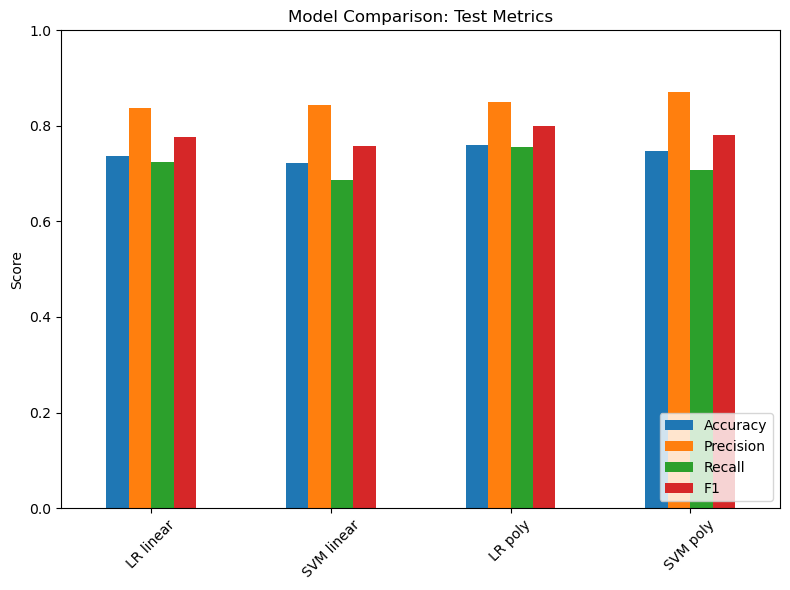

In [142]:
metrics_df.plot(kind='bar', figsize=(8,6))
plt.title("Model Comparison: Test Metrics")
plt.ylim(0,1)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('Models.png', dpi=300, bbox_inches='tight')
plt.show()

##
## 4.6 Plot loss curves side by side
##

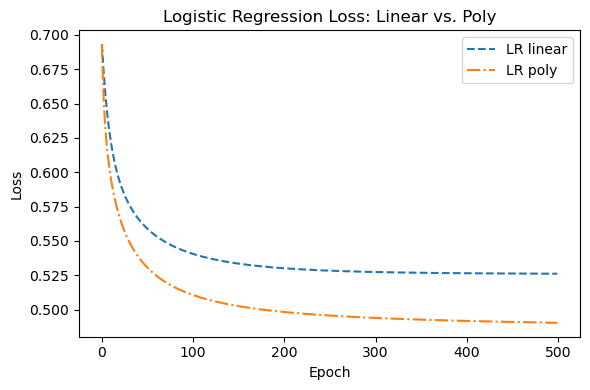

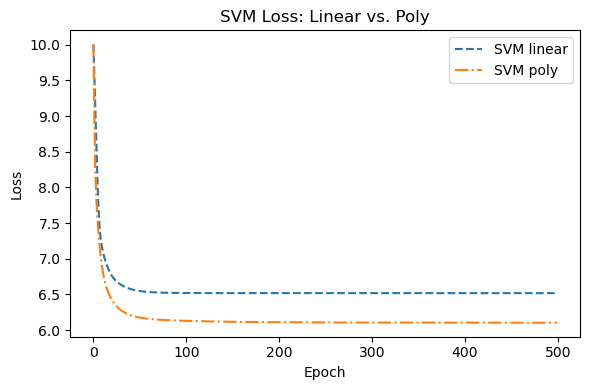

In [144]:
#   a) Logistic Regression losses
plt.figure(figsize=(6,4))
plt.plot(final_lr.loss_history,  '--', label='LR linear')
plt.plot(poly_lr.loss_history,   '-.', label='LR poly')
plt.title("Logistic Regression Loss: Linear vs. Poly")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

#   b) SVM losses
plt.figure(figsize=(6,4))
plt.plot(final_svm.loss_history,  '--', label='SVM linear')
plt.plot(poly_svm.loss_history,   '-.', label='SVM poly')
plt.title("SVM Loss: Linear vs. Poly")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig('loss.png', dpi=300, bbox_inches='tight')
plt.show()

##
## 4.7 Detect over- or underfitting by comparing train vs test accuracy
##


Train vs Test Accuracy:
               Train      Test
LR linear   0.745745  0.736154
SVM linear  0.734650  0.721538
LR poly     0.766717  0.760769
SVM poly    0.758359  0.747692


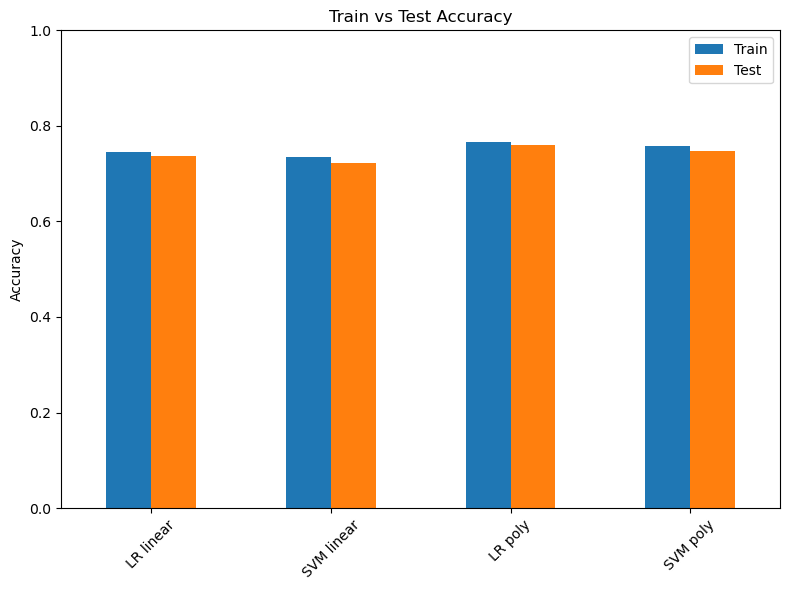

In [123]:
#    Compute train-set predictions
train_preds = {
    'LR linear': final_lr.predict(X_train_scaled.values),
    'SVM linear': final_svm.predict(X_train_scaled.values),
    'LR poly': poly_lr.predict(X_train_poly),
    'SVM poly': poly_svm.predict(X_train_poly),
}
train_metrics = {name: compute_metrics(y_train_res.values, yp)[0]
                 for name, yp in train_preds.items()}
test_metrics  = metrics_df['Accuracy'].to_dict()
acc_comp = pd.DataFrame({'Train': train_metrics, 'Test': test_metrics})

print("\nTrain vs Test Accuracy:")
print(acc_comp)

acc_comp.plot(kind='bar', figsize=(8,6))
plt.title("Train vs Test Accuracy")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##
## 4.8 Analyze misclassifications for one feature (example: 'alcohol')
##

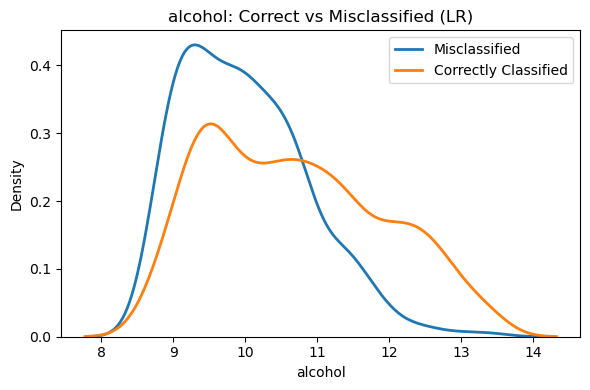

In [126]:
mis_idx  = np.where(y_test_arr != preds['LR linear'])[0]
corr_idx = np.where(y_test_arr == preds['LR linear'])[0]

feature_to_check = 'alcohol'

plt.figure(figsize=(6,4))
# use iloc here to index rows by integer position
sns.kdeplot(
    X_test.iloc[mis_idx][feature_to_check],
    label='Misclassified',
    linewidth=2
)
sns.kdeplot(
    X_test.iloc[corr_idx][feature_to_check],
    label='Correctly Classified',
    linewidth=2
)
plt.title(f"{feature_to_check}: Correct vs Misclassified (LR)")
plt.xlabel(feature_to_check)
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# apendix

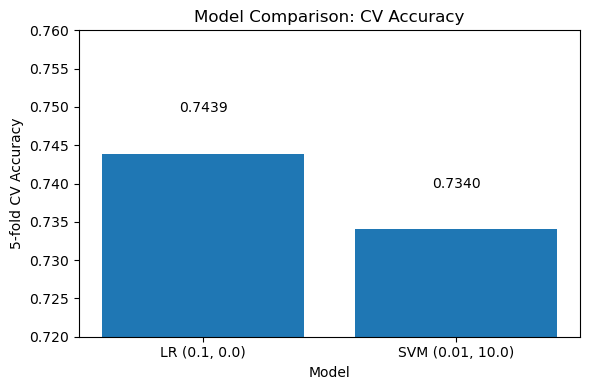

In [138]:
import matplotlib.pyplot as plt

# Data for the bar chart
models = ["LR (0.1, 0.0)", "SVM (0.01, 10.0)"]
cv_scores = [0.7439, 0.7340]

# Create the bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(models, cv_scores)

# Labels and title
plt.xlabel("Model")
plt.ylabel("5-fold CV Accuracy")
plt.title("Model Comparison: CV Accuracy")

# Annotate bars with their values
for bar, score in zip(bars, cv_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005,
             f"{score:.4f}", ha='center', va='bottom')

plt.ylim(0.72, 0.76)
plt.tight_layout()
plt.show()


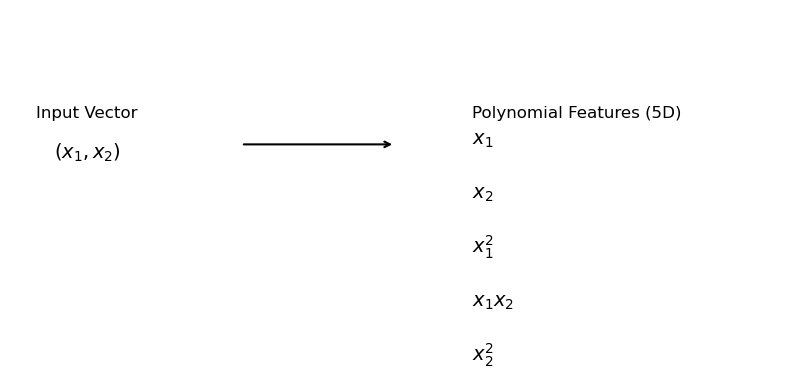

In [140]:
import matplotlib.pyplot as plt

# Create a diagram showing mapping from 2D to 5D polynomial features
plt.figure(figsize=(8, 4))
plt.axis('off')

# Coordinates for elements
x, y = 0.1, 0.5
features_x, features_y = 0.6, 0.5

# Draw input vector
plt.text(x, y + 0.1, 'Input Vector', fontsize=12, ha='center')
plt.text(x, y - 0.05, r'$(x_1, x_2)$', fontsize=14, ha='center')

# Draw arrow
plt.annotate('', xy=(0.5, 0.5), xytext=(0.3, 0.5),
             arrowprops=dict(arrowstyle='->', lw=1.5))

# Draw output feature vector
features = [r'$x_1$', r'$x_2$', r'$x_1^2$', r'$x_1 x_2$', r'$x_2^2$']
for i, feat in enumerate(features):
    plt.text(features_x, features_y - i*0.2, feat, fontsize=14, ha='left')

plt.text(features_x, features_y + 0.1, 'Polynomial Features (5D)', fontsize=12, ha='left')

plt.tight_layout()
plt.show()
